In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pydicom

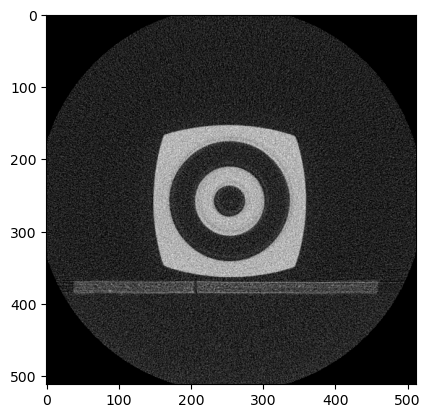

In [4]:
LOCAL_PATH = 'data/005-defect_free_nozzle' #path to example image
# LOCAL_PATH = 'C:/Users/bimrose2/Desktop/ZJU UIUC - CT Defect Detection/Nozzle CT Scans/035-defect_A_clog1'

from IPython.display import clear_output

img_files = os.listdir(LOCAL_PATH)

ds_16 = pydicom.read_file(os.path.join(LOCAL_PATH, img_files[200]))
img = ds_16.pixel_array

plt.imshow(img, cmap='gray')

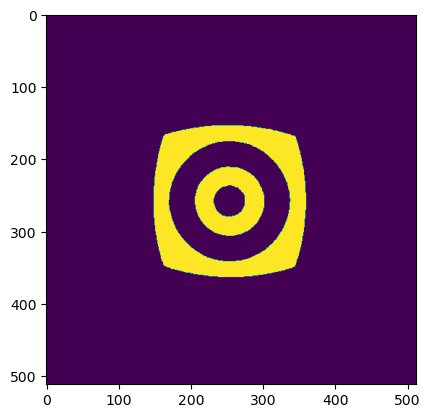

In [5]:
##Crop Image and create mask
img_raw_mask = np.array((img > 3900)).astype('uint8')

kernel = np.ones((5, 5), np.uint8)

img_mask_erode = cv2.erode(img_raw_mask, kernel=kernel)

img_mask = cv2.dilate(img_mask_erode, kernel=kernel)

img_mask = cv2.dilate(img_mask, kernel=kernel)

img_mask = cv2.erode(img_mask, kernel=kernel)

plt.imshow(img_mask)

min_img_mask = np.min(np.nonzero(img_mask), axis=1)
max_img_mask = np.max(np.nonzero(img_mask), axis=1)

mask_center = np.mean(np.nonzero(img_mask), axis=1)

pixel_vals = img[np.where(img_mask == 1)]
background_vals = img[np.where(img_mask != 1)]

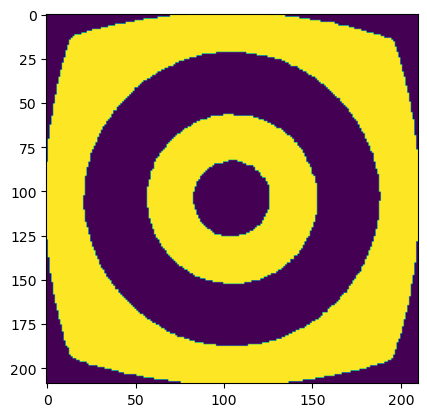

In [6]:
cropped_mask = img_mask[min_img_mask[0]:max_img_mask[0], min_img_mask[1]:max_img_mask[1]]

cropped_raw_mask = img_mask_erode[min_img_mask[0]:max_img_mask[0], min_img_mask[1]:max_img_mask[1]]

plt.imshow(cropped_mask)

In [7]:
radius = 16

major_radius = 10
minor_radius = 5
rand_theta = np.random.rand() * np.pi

point_thresh = 25

while(True):
    rand_x = np.random.randint(min_img_mask[0], max_img_mask[0])
    rand_y = np.random.randint(min_img_mask[1], max_img_mask[1])

    blank_img = np.zeros_like(img)
    #cv2.circle(blank_img, (rand_x, rand_y), radius, 1, -1)
    cv2.ellipse(blank_img, (rand_x, rand_y), (major_radius, minor_radius), int(np.rad2deg(np.pi/2 - rand_theta)), 0, 360, 1, -1)

    cropped_blank = blank_img[min_img_mask[0]:max_img_mask[0], min_img_mask[1]:max_img_mask[1]]

    num_new_pixels = np.shape(np.where((cropped_blank == 1) & (cropped_mask == 0)))[1]

    if num_new_pixels > point_thresh:

        plt.imshow(cropped_blank)
        plt.show()

        new_pixel_coords = np.where((blank_img == 1) & (img_mask_erode == ))

        new_pixel_val = np.random.randint(0, len(pixel_vals), np.shape(new_pixel_coords)[1])

        defect_img = np.copy(img)

        defect_img[new_pixel_coords] = pixel_vals[new_pixel_val]

        break

plt.imshow(img)
plt.show()

plt.imshow(defect_img, cmap='gray')
plt.axis('off')
plt.show()


SyntaxError: invalid syntax (3288519040.py, line 26)

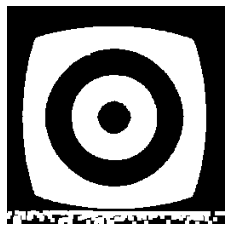

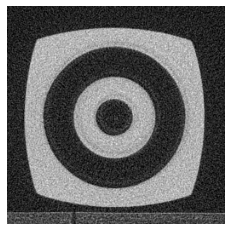

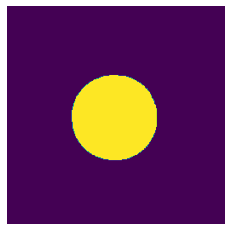

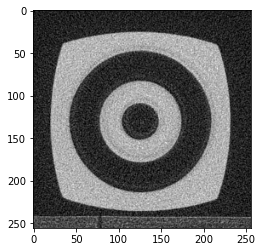

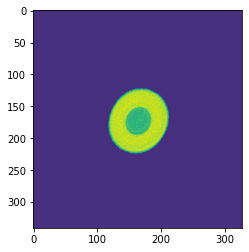

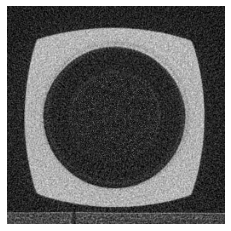

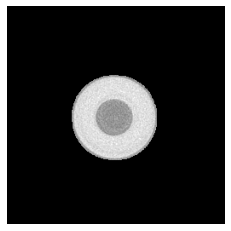

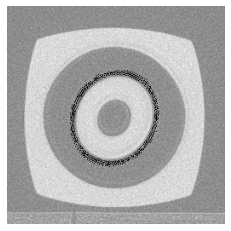

In [106]:
from scipy import ndimage

def background_pixel_generation(img_index):
    #cv2.imread(os.path.join(LOCAL_PATH, img_files[img_index]), cv2.IMREAD_GRAYSCALE)

    img_files = os.listdir(LOCAL_PATH)

    ds_16 = pydicom.read_file(os.path.join(LOCAL_PATH, img_files[200]))
    img = ds_16.pixel_array

    img = img[256-128:256+128, 256-128:256+128]

    plt.imshow(img, cmap='gray')
    plt.show()

    ##Crop Image and create mask
    img_raw_mask = np.array((img > (4000))).astype('uint8')
    
    kernel = np.ones((5, 5), np.uint8)

    img_mask_erode = cv2.erode(img_raw_mask, kernel=kernel)

    # img_mask = cv2.dilate(img_mask_erode, kernel=kernel)

    # img_mask = cv2.dilate(img_mask, kernel=kernel)

    # img_mask = cv2.erode(img_mask, kernel=kernel)

    pixel_vals = img[np.where(img_mask_erode == 1)]
    background_vals = img[np.where(img_mask != 1)]

    return background_vals


# for idx in range(len(img_files)):


img_files = os.listdir(LOCAL_PATH)

num_repeats = 1

img_files = os.listdir(LOCAL_PATH)

ds_16 = pydicom.read_file(os.path.join(LOCAL_PATH, img_files[200]))
img = ds_16.pixel_array

img = img[256-128:256+128, 256-128:256+128]

#img = cv2.imread(os.path.join(LOCAL_PATH, img_files[idx]), cv2.IMREAD_GRAYSCALE)
for index in range(num_repeats):
    img_raw_mask = np.array((img > (4000))).astype('uint8')

    kernel = np.ones((5, 5), np.uint8)

    img_mask = cv2.dilate(img_raw_mask, kernel=kernel)

    img_mask_erode = cv2.erode(img_mask, kernel=kernel)

    img_mask_dilate = cv2.dilate(img_mask_erode, kernel=kernel)

    img_mask = cv2.erode(img_mask_dilate, kernel=kernel)

    plt.imshow(img_mask_dilate, cmap='gray')
    plt.axis('off')
    plt.show()

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

    contours, hierarchy = cv2.findContours(img_mask_dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # contours = contours[-4:]

    hierarchy = np.squeeze(hierarchy)

    # elif 


    internal_channel = [contours[i] for i in range(len(contours)) if ((hierarchy[i][3] == np.sort(hierarchy[:, 3])[-2]) & (hierarchy[i][3] != -1))]

    #internal_channel = contours[1]
    blank_img = np.zeros(np.shape(img))
    cv2.drawContours(blank_img, internal_channel, -1 ,1, -1)
    plt.imshow(blank_img)
    plt.axis('off')
    plt.show()

    # cv2.drawContours(img, contours, -1, 255, 5)

    background_vals = background_pixel_generation(200)

    new_pixel_coords = np.where(blank_img == 1)

    shift_r = 0#np.random.uniform(3, 10)
    shift_theta = np.random.uniform(0, 2*np.pi)

    shift_x = int(shift_r*np.cos(shift_theta))
    shift_y = int(shift_r*np.sin(shift_theta))

    defect_template = np.zeros(np.shape(img))

    defect_template[new_pixel_coords[0], new_pixel_coords[1]] = img[new_pixel_coords]

    ellipse_major = 1 + np.random.uniform(.025, .1)
    ellipse_minor = 1 - np.random.uniform(.025, .1)
    ellipse_angle = np.random.randint(0, 180)

    defect_ellipse = cv2.resize(defect_template, (int(ellipse_major*256),int(ellipse_minor*256)), interpolation=cv2.INTER_LANCZOS4)

    defect_ellipse = ndimage.rotate(defect_ellipse, ellipse_angle)

    defect_ellipse_center = np.mean(np.where(defect_ellipse > 1), axis=1).astype(int)#(np.array(np.shape(defect_ellipse))/2).astype(int)

    plt.imshow(defect_ellipse)
    plt.show()

    background_pixel_val = np.random.randint(0, len(background_vals), np.shape(new_pixel_coords)[1])

    defect_img = np.copy(img)

    defect_img[new_pixel_coords] = background_vals[background_pixel_val]

    plt.imshow(defect_img, cmap='gray')
    plt.axis('off')
    plt.show()

    plt.imshow(defect_template, cmap='gray')
    plt.axis('off')
    plt.show()

    defect_template_center = np.mean(np.where(defect_template > 1), axis=1).astype(int)

    defect_img[np.where(defect_ellipse > 1)[0] - defect_ellipse_center[0] + defect_template_center[0] + shift_x,
        np.where(defect_ellipse > 1)[1] - defect_ellipse_center[1] + defect_template_center[1] + shift_y] = defect_ellipse[np.where(defect_ellipse > 1)]
    
    plt.imshow(defect_img, cmap='gray')
    plt.axis('off')
    plt.show()

In [96]:
np.sqrt(len(background_vals))

140.95744038538726

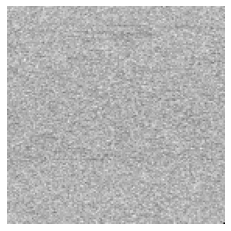

In [97]:
backgrounnd_img_vals = np.append(np.array(background_vals[:140**2-1]), np.min(img))
background_img = np.reshape(backgrounnd_img_vals[:140**2]/256, (140, 140))

plt.imshow(background_img, cmap='gray')
plt.axis('off')
plt.show()

In [88]:
np.max(background_img)

100.0

In [9]:
import shutil
LOCAL_PATH = 'data/defect_free' #path to defect free images

new_img_list = os.listdir(LOCAL_PATH)

for file in new_img_list:
    if (int(file.split('_')[-2]) > 30) & (int(file.split('_')[-2]) < 400):
        shutil.copy(os.path.join(LOCAL_PATH, file), 'C:/Users/bimrose2/Desktop/ZJU UIUC - CT Defect Detection/Data/sorted/defect_free')

In [4]:
def pixel_generation(img_index):
    img = cv2.imread(os.path.join(LOCAL_PATH, img_files[img_index]), cv2.IMREAD_GRAYSCALE)

    ##Crop Image and create mask
    #img_raw_mask = np.array((img > (3900/256))).astype('uint8')
    img_raw_mask = np.array((img > (256/2))).astype('uint8')

    kernel = np.ones((5, 5), np.uint8)

    img_mask_erode = cv2.erode(img_raw_mask, kernel=kernel)

    img_mask = cv2.dilate(img_mask_erode, kernel=kernel)

    img_mask = cv2.dilate(img_mask, kernel=kernel)

    img_mask = cv2.erode(img_mask, kernel=kernel)

    pixel_vals = img[np.where(img_mask == 1)]
    background_vals = img[np.where(img_mask != 1)]

    return pixel_vals


# LOCAL_PATH = 'C:/Users/bimrose2/Desktop/ZJU UIUC - CT Defect Detection/Data/sorted/defect_free_5x'
LOCAL_PATH = 'data/defect_free' #path to defect free images

img_files = os.listdir(LOCAL_PATH)

for idx in range(len(img_files)):
    # ds_16 = pydicom.read_file(os.path.join(LOCAL_PATH, img_files[idx]))
    # img = ds_16.pixel_array
    img = cv2.imread(os.path.join(LOCAL_PATH, img_files[idx]), cv2.IMREAD_UNCHANGED)

    ##Crop Image and create mask
    # img_raw_mask = np.array((img > (3900/256))).astype('uint8')
    # img_raw_mask = np.array((img > (3900))).astype('uint8')
    img_raw_mask = np.array((img > (256/2))).astype('uint8')

    kernel = np.ones((5, 5), np.uint8)

    img_mask_erode = cv2.erode(img_raw_mask, kernel=kernel)

    img_mask = cv2.dilate(img_mask_erode, kernel=kernel)

    img_mask = cv2.dilate(img_mask, kernel=kernel)

    img_mask = cv2.erode(img_mask, kernel=kernel)

    
    pixel_vals = img[np.where(img_mask == 1)]

    while np.shape(pixel_vals)[0] == 0:
        rand_index = np.random.randint(0, len(img_files))
        pixel_vals = pixel_generation(rand_index)

    background_vals = img[np.where(img_mask != 1)]

    if len(np.nonzero(img_mask)[0]) > 0:

        min_img_mask = np.min(np.nonzero(img_mask), axis=1)
        max_img_mask = np.max(np.nonzero(img_mask), axis=1)

        mask_center = np.mean(np.nonzero(img_mask), axis=1)

        cropped_mask = img_mask[min_img_mask[0]:max_img_mask[0], min_img_mask[1]:max_img_mask[1]]

        cropped_raw_mask = img_mask_erode[min_img_mask[0]:max_img_mask[0], min_img_mask[1]:max_img_mask[1]]
    
    else:
        min_img_mask = np.zeros(2, dtype='uint8')
        max_img_mask = np.shape(img_mask)
        cropped_mask = img_mask
        cropped_raw_mask = img_mask_erode

    # radius = 10
    radius = np.random.randint(5, 16)

    point_thresh = min(2.5*radius**2, 250) #Make sure the points are relatively centered in the channel

    iterations = 0

    #loc_radius = 45 + ((np.random.random(1) - .5) * 3) #Synthetic Defect A
    
    if int(img_files[idx].split('_')[-2]) < 100:
        loc_radius = np.random.randint(0, 50) + ((np.random.random(1) - .5) * 3)
    else:
        loc_radius = np.random.randint(40, 80) + ((np.random.random(1) - .5) * 3)

    image_has_defect = True

    while(True):
        # rand_x = np.random.randint(min_img_mask[0], max_img_mask[0])
        # rand_y = np.random.randint(min_img_mask[1], max_img_mask[1])
        rand_theta = (np.pi/2)*np.random.randint(0,4) + ((np.random.random(1) - .5) * np.pi/20)

        rand_x = 128 + int(loc_radius * np.cos(rand_theta))
        rand_y = 128 + int(loc_radius * np.sin(rand_theta))

        blank_img = np.zeros_like(img)
        cv2.circle(blank_img, (rand_x, rand_y), radius, 1, -1)

        cropped_blank = blank_img[min_img_mask[0]:max_img_mask[0], min_img_mask[1]:max_img_mask[1]]

        num_new_pixels = np.shape(np.where((cropped_blank == 1) & (cropped_mask == 0)))[1]

        if (num_new_pixels > point_thresh):

            new_pixel_coords = np.where((blank_img == 1) & (img_mask_erode == 0))

            new_pixel_val = np.random.randint(0, len(pixel_vals), np.shape(new_pixel_coords)[1])

            defect_img = np.copy(img)

            defect_img[new_pixel_coords] = pixel_vals[new_pixel_val]

            break 
            
        if (iterations > 1000):
            image_has_defect = False

            break 

        iterations += 1

    if image_has_defect:
        cv2.imwrite('data/defect_synthetic_square_real_eval/' + img_files[idx], defect_img) #path to save synthetic images

    # print(img_files[idx])

KeyboardInterrupt: 

In [5]:
def pixel_generation(img_index):
    img = cv2.imread(os.path.join(LOCAL_PATH, img_files[img_index]), cv2.IMREAD_GRAYSCALE)

    ##Crop Image and create mask
    #img_raw_mask = np.array((img > (3900/256))).astype('uint8')
    img_raw_mask = np.array((img > (256/2))).astype('uint8')

    kernel = np.ones((5, 5), np.uint8)

    img_mask_erode = cv2.erode(img_raw_mask, kernel=kernel)

    img_mask = cv2.dilate(img_mask_erode, kernel=kernel)

    img_mask = cv2.dilate(img_mask, kernel=kernel)

    img_mask = cv2.erode(img_mask, kernel=kernel)

    pixel_vals = img[np.where(img_mask == 1)]
    background_vals = img[np.where(img_mask != 1)]

    return pixel_vals

def background_pixel_generation(img_index):
    img = cv2.imread(os.path.join(LOCAL_PATH, img_files[img_index]), cv2.IMREAD_GRAYSCALE)

    ##Crop Image and create mask
    #img_raw_mask = np.array((img > (3900/256))).astype('uint8')
    img_raw_mask = np.array((img < (256/2))).astype('uint8')

    kernel = np.ones((5, 5), np.uint8)

    img_mask_erode = cv2.erode(img_raw_mask, kernel=kernel)

    # img_mask = cv2.dilate(img_mask_erode, kernel=kernel)

    # img_mask = cv2.dilate(img_mask, kernel=kernel)

    # img_mask = cv2.erode(img_mask, kernel=kernel)

    pixel_vals = img[np.where(img_mask == 1)]
    background_vals = img[np.where(img_mask != 1)]

    return pixel_vals

LOCAL_PATH = 'data/defect_free' #path to defect free images

img_files = os.listdir(LOCAL_PATH)

for idx in range(len(img_files)):
    # ds_16 = pydicom.read_file(os.path.join(LOCAL_PATH, img_files[idx]))
    # img = ds_16.pixel_array
    img = cv2.imread(os.path.join(LOCAL_PATH, img_files[idx]), cv2.IMREAD_UNCHANGED)

    ##Crop Image and create mask
    # img_raw_mask = np.array((img > (3900/256))).astype('uint8')
    # img_raw_mask = np.array((img > (3900))).astype('uint8')
    img_raw_mask = np.array((img > (256/2))).astype('uint8')

    kernel = np.ones((5, 5), np.uint8)

    img_mask_erode = cv2.erode(img_raw_mask, kernel=kernel)

    img_mask = cv2.dilate(img_mask_erode, kernel=kernel)

    img_mask_dilate = cv2.dilate(img_mask, kernel=kernel)

    img_mask = cv2.erode(img_mask_dilate, kernel=kernel)

    
    pixel_vals = img[np.where(img_mask == 1)]

    while np.shape(pixel_vals)[0] == 0:
        rand_index = np.random.randint(0, len(img_files))
        pixel_vals = pixel_generation(rand_index)

    background_vals = img[np.where(img_mask_dilate != 1)]

    if len(np.nonzero(img_mask)[0]) > 0:

        min_img_mask = np.min(np.nonzero(img_mask), axis=1)
        max_img_mask = np.max(np.nonzero(img_mask), axis=1)

        mask_center = np.mean(np.nonzero(img_mask), axis=1)

        cropped_mask = img_mask[min_img_mask[0]:max_img_mask[0], min_img_mask[1]:max_img_mask[1]]

        cropped_raw_mask = img_mask_erode[min_img_mask[0]:max_img_mask[0], min_img_mask[1]:max_img_mask[1]]
    
    else:
        min_img_mask = np.zeros(2, dtype='uint8')
        max_img_mask = np.shape(img_mask)
        cropped_mask = img_mask
        cropped_raw_mask = img_mask_erode

    # radius = 10
    radius = np.random.randint(5, 16)

    point_thresh = min(2.5*radius**2, 250) #Make sure the points are relatively centered in the channel

    iterations = 0

    #loc_radius = 45 + ((np.random.random(1) - .5) * 3) #Synthetic Defect A
    
    if int(img_files[idx].split('_')[-2]) < 100:
        loc_radius = np.random.randint(0, 50) + ((np.random.random(1) - .5) * 3)
    else:
        loc_radius = np.random.randint(40, 80) + ((np.random.random(1) - .5) * 3)

    image_has_defect = True

    while(True):
        # rand_x = np.random.randint(min_img_mask[0], max_img_mask[0])
        # rand_y = np.random.randint(min_img_mask[1], max_img_mask[1])
        #rand_theta = (np.pi/2)*np.random.randint(0,4) + ((np.random.random(1) - .5) * np.pi/20)
        rand_theta = (2*np.pi)*np.random.random(1)  #Randomly located at any point

        rand_x = 128 + int(loc_radius * np.cos(rand_theta))
        rand_y = 128 + int(loc_radius * np.sin(rand_theta))

        blank_img = np.zeros_like(img)
        cv2.circle(blank_img, (rand_x, rand_y), radius, 1, -1)

        cropped_blank = blank_img[min_img_mask[0]:max_img_mask[0], min_img_mask[1]:max_img_mask[1]]

        num_new_pixels = np.shape(np.where((cropped_blank == 1) & (cropped_mask == 0)))[1]

        if (num_new_pixels > point_thresh):

            new_pixel_coords = np.where((blank_img == 1) & (img_mask_erode == 0))

            new_pixel_val = np.random.randint(0, len(pixel_vals), np.shape(new_pixel_coords)[1])

            defect_img = np.copy(img)

            defect_img[new_pixel_coords] = pixel_vals[new_pixel_val]

            break 
            
        if (iterations > 1000):
            image_has_defect = False

            break 

        iterations += 1

    if image_has_defect:
        cv2.imwrite('data/defect_synthetic_clog/' + img_files[idx], defect_img) #path to save synthetic images

    radius = np.random.randint(5, 16)

    point_thresh = min(2.5*radius**2, 150) #Make sure the points are relatively centered in the channel

    iterations = 0

    #loc_radius = 45 + ((np.random.random(1) - .5) * 3) #Synthetic Defect A
    
    if int(img_files[idx].split('_')[-2]) < 100:
        loc_radius = np.random.randint(0, 50) + ((np.random.random(1) - .5) * 3)
    else:
        loc_radius = np.random.randint(40, 80) + ((np.random.random(1) - .5) * 3)

    image_has_defect = True

    while(True):
        # rand_x = np.random.randint(min_img_mask[0], max_img_mask[0])
        # rand_y = np.random.randint(min_img_mask[1], max_img_mask[1])
        #rand_theta = (np.pi/2)*np.random.randint(0,4) + ((np.random.random(1) - .5) * np.pi/20)
        rand_theta = (2*np.pi)*np.random.random(1)  #Randomly located at any point

        rand_x = 128 + int(loc_radius * np.cos(rand_theta))
        rand_y = 128 + int(loc_radius * np.sin(rand_theta))

        blank_img = np.zeros_like(img)
        cv2.circle(blank_img, (rand_x, rand_y), radius, 1, -1)

        cropped_blank = blank_img[min_img_mask[0]:max_img_mask[0], min_img_mask[1]:max_img_mask[1]]

        num_new_pixels = np.shape(np.where((cropped_blank == 1) & (cropped_mask == 1)))[1]

        if (num_new_pixels > point_thresh):

            new_pixel_coords = np.where((blank_img == 1) & (img_mask_dilate == 1))

            new_pixel_val = np.random.randint(0, len(background_vals), np.shape(new_pixel_coords)[1])

            defect_img = np.copy(img)

            defect_img[new_pixel_coords] = background_vals[new_pixel_val]

            break 
            
        if (iterations > 1000):
            image_has_defect = False

            break 

        iterations += 1

    if image_has_defect:
        cv2.imwrite('data/defect_synthetic_void/' + img_files[idx], defect_img) #path to save synthetic images

    # print(img_files[idx])

KeyboardInterrupt: 

In [6]:
if os.path.isdir('data/defect_synthetic_void') == False:
    os.makedirs('data/defect_synthetic_void/')
if os.path.isdir('data/defect_synthetic_clog') == False:
    os.makedirs('data/defect_synthetic_clog/')

def pixel_generation(img_index):
    img = cv2.imread(os.path.join(LOCAL_PATH, img_files[img_index]), cv2.IMREAD_GRAYSCALE)

    ##Crop Image and create mask
    #img_raw_mask = np.array((img > (3900/256))).astype('uint8')
    img_raw_mask = np.array((img > (256/2))).astype('uint8')

    kernel = np.ones((5, 5), np.uint8)

    img_mask_erode = cv2.erode(img_raw_mask, kernel=kernel)

    img_mask = cv2.dilate(img_mask_erode, kernel=kernel)

    img_mask = cv2.dilate(img_mask, kernel=kernel)

    img_mask = cv2.erode(img_mask, kernel=kernel)

    pixel_vals = img[np.where(img_mask == 1)]
    background_vals = img[np.where(img_mask != 1)]

    return pixel_vals

def background_pixel_generation(img_index):
    img = cv2.imread(os.path.join(LOCAL_PATH, img_files[img_index]), cv2.IMREAD_GRAYSCALE)

    ##Crop Image and create mask
    #img_raw_mask = np.array((img > (3900/256))).astype('uint8')
    img_raw_mask = np.array((img < (256/2))).astype('uint8')

    kernel = np.ones((5, 5), np.uint8)

    img_mask_erode = cv2.erode(img_raw_mask, kernel=kernel)

    # img_mask = cv2.dilate(img_mask_erode, kernel=kernel)

    # img_mask = cv2.dilate(img_mask, kernel=kernel)

    # img_mask = cv2.erode(img_mask, kernel=kernel)

    pixel_vals = img[np.where(img_mask_erode == 1)]
    background_vals = img[np.where(img_mask != 1)]

    return pixel_vals

LOCAL_PATH = 'data/defect_free' #path to defect free images

img_files = os.listdir(LOCAL_PATH)

for idx in range(len(img_files)):
    # ds_16 = pydicom.read_file(os.path.join(LOCAL_PATH, img_files[idx]))
    # img = ds_16.pixel_array
    img = cv2.imread(os.path.join(LOCAL_PATH, img_files[idx]), cv2.IMREAD_UNCHANGED)

    ##Crop Image and create mask
    # img_raw_mask = np.array((img > (3900/256))).astype('uint8')
    # img_raw_mask = np.array((img > (3900))).astype('uint8')
    img_raw_mask = np.array((img > (256/2))).astype('uint8')

    kernel = np.ones((5, 5), np.uint8)

    img_mask_erode = cv2.erode(img_raw_mask, kernel=kernel)

    img_mask = cv2.dilate(img_mask_erode, kernel=kernel)

    img_mask_dilate = cv2.dilate(img_mask, kernel=kernel)

    img_mask = cv2.erode(img_mask_dilate, kernel=kernel)

    
    pixel_vals = img[np.where(img_mask == 1)]

    while np.shape(pixel_vals)[0] == 0:
        rand_index = np.random.randint(0, len(img_files))
        pixel_vals = pixel_generation(rand_index)

    #background_vals = img[np.where(img_mask_dilate != 1)]

    if len(np.nonzero(img_mask)[0]) > 0:

        min_img_mask = np.min(np.nonzero(img_mask), axis=1)
        max_img_mask = np.max(np.nonzero(img_mask), axis=1)

        mask_center = np.mean(np.nonzero(img_mask), axis=1)

        cropped_mask = img_mask[min_img_mask[0]:max_img_mask[0], min_img_mask[1]:max_img_mask[1]]

        cropped_raw_mask = img_mask_erode[min_img_mask[0]:max_img_mask[0], min_img_mask[1]:max_img_mask[1]]
    
    else:
        min_img_mask = np.zeros(2, dtype='uint8')
        max_img_mask = np.shape(img_mask)
        cropped_mask = img_mask
        cropped_raw_mask = img_mask_erode

    # radius = 10
    #radius = np.random.randint(5, 16)
    radius = np.random.randint(2, 16)

    point_thresh = min(2.5*radius**2, 20) #Make sure the points are relatively centered in the channel

    iterations = 0

    #loc_radius = 45 + ((np.random.random(1) - .5) * 3) #Synthetic Defect A
    
    if int(img_files[idx].split('_')[-2]) < 100:
        loc_radius = np.random.randint(0, 50) + ((np.random.random(1) - .5) * 3)
    else:
        loc_radius = np.random.randint(40, 80) + ((np.random.random(1) - .5) * 3)

    image_has_defect = True

    while(True):
        # rand_x = np.random.randint(min_img_mask[0], max_img_mask[0])
        # rand_y = np.random.randint(min_img_mask[1], max_img_mask[1])
        #rand_theta = (np.pi/2)*np.random.randint(0,4) + ((np.random.random(1) - .5) * np.pi/20)
        rand_theta = (2*np.pi)*np.random.random(1)  #Randomly located at any point

        rand_x = 128 + int(loc_radius * np.cos(rand_theta))
        rand_y = 128 + int(loc_radius * np.sin(rand_theta))

        blank_img = np.zeros_like(img)
        cv2.circle(blank_img, (rand_x, rand_y), radius, 1, -1)

        cropped_blank = blank_img[min_img_mask[0]:max_img_mask[0], min_img_mask[1]:max_img_mask[1]]

        num_new_pixels = np.shape(np.where((cropped_blank == 1) & (cropped_mask == 0)))[1]

        if (num_new_pixels > point_thresh):

            new_pixel_coords = np.where((blank_img == 1) & (img_mask_erode == 0))

            new_pixel_val = np.random.randint(0, len(pixel_vals), np.shape(new_pixel_coords)[1])

            defect_img = np.copy(img)

            defect_img[new_pixel_coords] = pixel_vals[new_pixel_val]

            break 
            
        if (iterations > 100):
            image_has_defect = False

            break 

        iterations += 1

    if image_has_defect:
        cv2.imwrite('data/defect_synthetic_clog/' + img_files[idx], defect_img)

    radius = np.random.randint(2, 16)

    point_thresh = min(2.5*radius**2, 20) #Make sure the points are relatively centered in the channel

    iterations = 0

    #loc_radius = 45 + ((np.random.random(1) - .5) * 3) #Synthetic Defect A
    
    if int(img_files[idx].split('_')[-2]) < 100:
        loc_radius = np.random.randint(0, 50) + ((np.random.random(1) - .5) * 3)
    else:
        loc_radius = np.random.randint(40, 80) + ((np.random.random(1) - .5) * 3)

    image_has_defect = True

    background_vals = background_pixel_generation(idx)

    while(True):
        # rand_x = np.random.randint(min_img_mask[0], max_img_mask[0])
        # rand_y = np.random.randint(min_img_mask[1], max_img_mask[1])
        #rand_theta = (np.pi/2)*np.random.randint(0,4) + ((np.random.random(1) - .5) * np.pi/20)
        rand_theta = (2*np.pi)*np.random.random(1)  #Randomly located at any point

        rand_x = 128 + int(loc_radius * np.cos(rand_theta))
        rand_y = 128 + int(loc_radius * np.sin(rand_theta))

        blank_img = np.zeros_like(img)
        cv2.circle(blank_img, (rand_x, rand_y), radius, 1, -1)

        cropped_blank = blank_img[min_img_mask[0]:max_img_mask[0], min_img_mask[1]:max_img_mask[1]]

        num_new_pixels = np.shape(np.where((cropped_blank == 1) & (cropped_mask == 1)))[1]

        if (num_new_pixels > point_thresh):

            new_pixel_coords = np.where((blank_img == 1) & (cv2.dilate(img_mask_dilate, kernel=kernel) == 1))

            new_pixel_val = np.random.randint(0, len(background_vals), np.shape(new_pixel_coords)[1])

            defect_img = np.copy(img)

            defect_img[new_pixel_coords] = background_vals[new_pixel_val]

            break 
            
        if (iterations > 100):
            image_has_defect = False

            break 

        iterations += 1

    if image_has_defect:
        cv2.imwrite('data/defect_synthetic_void/' + img_files[idx], defect_img)

    major_radius = np.random.randint(2, 16)
    minor_radius = np.random.randint(2, 16)

    point_thresh = min(2.5*radius**2, 20) #Make sure the points are relatively centered in the channel

    iterations = 0

    #loc_radius = 45 + ((np.random.random(1) - .5) * 3) #Synthetic Defect A
    
    if int(img_files[idx].split('_')[-2]) < 100:
        loc_radius = np.random.randint(0, 50) + ((np.random.random(1) - .5) * 3)
    else:
        loc_radius = np.random.randint(40, 80) + ((np.random.random(1) - .5) * 3)

    image_has_defect = True

    background_vals = background_pixel_generation(idx)

    while(True):
        # rand_x = np.random.randint(min_img_mask[0], max_img_mask[0])
        # rand_y = np.random.randint(min_img_mask[1], max_img_mask[1])
        #rand_theta = (np.pi/2)*np.random.randint(0,4) + ((np.random.random(1) - .5) * np.pi/20)
        rand_theta = (2*np.pi)*np.random.random(1)  #Randomly located at any point

        rand_x = 128 + int(loc_radius * np.cos(rand_theta))
        rand_y = 128 + int(loc_radius * np.sin(rand_theta))

        blank_img = np.zeros_like(img)
        #cv2.circle(blank_img, (rand_x, rand_y), radius, 1, -1)
        cv2.ellipse(blank_img, (rand_x, rand_y), (major_radius, minor_radius), int(np.rad2deg(np.pi/2 - rand_theta)), 0, 360, 1, -1)

        cropped_blank = blank_img[min_img_mask[0]:max_img_mask[0], min_img_mask[1]:max_img_mask[1]]

        num_new_pixels = np.shape(np.where((cropped_blank == 1) & (cropped_mask == 1)))[1]

        if (num_new_pixels > point_thresh):

            new_pixel_coords = np.where((blank_img == 1) & (cv2.dilate(img_mask_dilate, kernel=kernel) == 1))

            new_pixel_val = np.random.randint(0, len(background_vals), np.shape(new_pixel_coords)[1])

            defect_img = np.copy(img)

            defect_img[new_pixel_coords] = background_vals[new_pixel_val]

            break 
            
        if (iterations > 100):
            image_has_defect = False

            break 

        iterations += 1

    if image_has_defect:
        cv2.imwrite('data/defect_synthetic_void/' + 'e_' + img_files[idx], defect_img)

    # print(img_files[idx])

In [7]:
from scipy import ndimage

if os.path.isdir('data/defect_synthetic_ellipticity') == False:
    os.makedirs('data/defect_synthetic_ellipticity/')

def background_pixel_generation(img_index):
    img = cv2.imread(os.path.join(LOCAL_PATH, img_files[img_index]), cv2.IMREAD_GRAYSCALE)

    ##Crop Image and create mask
    #img_raw_mask = np.array((img > (3900/256))).astype('uint8')
    img_raw_mask = np.array((img < (256/2))).astype('uint8')

    kernel = np.ones((5, 5), np.uint8)

    img_mask_erode = cv2.erode(img_raw_mask, kernel=kernel)

    # img_mask = cv2.dilate(img_mask_erode, kernel=kernel)

    # img_mask = cv2.dilate(img_mask, kernel=kernel)

    # img_mask = cv2.erode(img_mask, kernel=kernel)

    pixel_vals = img[np.where(img_mask_erode == 1)]
    background_vals = img[np.where(img_mask != 1)]

    return pixel_vals


# for idx in range(len(img_files)):


LOCAL_PATH = 'data/defect_free' #path to defect free images

img_files = os.listdir(LOCAL_PATH)

num_repeats = 2

for repeat in range(num_repeats):

    for idx in range(len(img_files)):

        img = cv2.imread(os.path.join(LOCAL_PATH, img_files[idx]), cv2.IMREAD_GRAYSCALE)

        img_raw_mask = np.array((img > (256/2))).astype('uint8')

        kernel = np.ones((5, 5), np.uint8)

        img_mask = cv2.dilate(img_raw_mask, kernel=kernel)

        img_mask_erode = cv2.erode(img_mask, kernel=kernel)

        img_mask_dilate = cv2.dilate(img_mask_erode, kernel=kernel)

        img_mask = cv2.erode(img_mask_dilate, kernel=kernel)

        # plt.imshow(img_mask_dilate, cmap='gray')
        # plt.show()

        # plt.imshow(img, cmap='gray')
        # plt.show()

        contours, hierarchy = cv2.findContours(img_mask_dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        #contours = contours[-4:]

        hierarchy = np.squeeze(hierarchy)

        if np.shape(hierarchy) == ():
            continue
        elif np.shape(contours)[0] <= 3:
            continue
        # elif 

        if np.sort(hierarchy[:, 3])[-1] == np.sort(hierarchy[:, 3])[-2]:
            continue

        internal_channel = [contours[i] for i in range(len(contours)) if ((hierarchy[i][3] == np.sort(hierarchy[:, 3])[-2]) & (hierarchy[i][3] != -1))]

        if (len(internal_channel) == 0):
            continue
        elif (cv2.contourArea(internal_channel[0]) < 100):
            continue

        #internal_channel = contours[1]
        blank_img = np.zeros(np.shape(img))
        cv2.drawContours(blank_img, internal_channel, -1 ,1, -1)
        # plt.imshow(blank_img)
        # plt.show()
        
        #cv2.drawContours(img, contours, -1, 255, 5)

        background_vals = background_pixel_generation(idx)

        new_pixel_coords = np.where(blank_img == 1)

        shift_x = 0
        shift_y = 0

        defect_template = np.zeros(np.shape(img))

        defect_template[new_pixel_coords[0], new_pixel_coords[1]] = img[new_pixel_coords]

        if np.random.uniform(0, 1) > .25:
            ellipse_major = 1 + np.random.uniform(.005, .02)
            ellipse_minor = 1
        else:
            ellipse_major = 1 + np.random.uniform(.01, .1)
            ellipse_minor = 1 - np.random.uniform(.01, .1)
        

        ellipse_angle = np.random.randint(0, 180)

        # plt.imshow(defect_template)
        # plt.show()


        # defect_template = ndimage.rotate(defect_template, -ellipse_angle)

        # center_coords = np.mean(np.where(defect_template > 1), axis=1).astype(int)

        # defect_template = defect_template[center_coords[0] - 128:center_coords[0] + 128, center_coords[1] - 128:center_coords[1] + 128]

        # plt.imshow(defect_template)
        # plt.show()

        defect_ellipse = cv2.resize(defect_template, (int(ellipse_major*256),int(ellipse_minor*256)), interpolation=cv2.INTER_CUBIC)

        defect_ellipse = ndimage.rotate(defect_ellipse, ellipse_angle)

        #Add some noise
        defect_ellipse[defect_ellipse > 1] += np.random.normal(loc=0, scale=5, size=np.shape(np.where(defect_ellipse > 1)[1]))

        defect_ellipse_center = np.mean(np.where(defect_ellipse > 1), axis=1).astype(int)#(np.array(np.shape(defect_ellipse))/2).astype(int)

        # plt.imshow(defect_ellipse)
        # plt.show()

        background_pixel_val = np.random.randint(0, len(background_vals), np.shape(new_pixel_coords)[1])

        defect_img = np.copy(img)

        defect_img[new_pixel_coords] = background_vals[background_pixel_val]

        # plt.imshow(defect_img, cmap='gray')
        # plt.show()

        # plt.imshow(defect_template, cmap='gray')
        # plt.show()

        defect_template_center = np.mean(np.where(defect_template > 1), axis=1).astype(int)

        defect_img[np.where(defect_ellipse > 1)[0] - defect_ellipse_center[0] + defect_template_center[0] + shift_x,
            np.where(defect_ellipse > 1)[1] - defect_ellipse_center[1] + defect_template_center[1] + shift_y] = defect_ellipse[np.where(defect_ellipse > 1)]

        cv2.imwrite('data/defect_synthetic_ellipticity/' + str(repeat) + '_' + img_files[idx], defect_img)

        # print(idx)
        # plt.imshow(defect_img, cmap='gray')
        # plt.show()

c:\Users\bimrose2\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [ ]:
from scipy import ndimage

if os.path.isdir('data/defect_synthetic_concentricity') == False:
    os.makedirs('data/defect_synthetic_concentricity/')

def background_pixel_generation(img_index):
    img = cv2.imread(os.path.join(LOCAL_PATH, img_files[img_index]), cv2.IMREAD_GRAYSCALE)

    ##Crop Image and create mask
    #img_raw_mask = np.array((img > (3900/256))).astype('uint8')
    img_raw_mask = np.array((img < (256/2))).astype('uint8')

    kernel = np.ones((5, 5), np.uint8)

    img_mask_erode = cv2.erode(img_raw_mask, kernel=kernel)

    # img_mask = cv2.dilate(img_mask_erode, kernel=kernel)

    # img_mask = cv2.dilate(img_mask, kernel=kernel)

    # img_mask = cv2.erode(img_mask, kernel=kernel)

    pixel_vals = img[np.where(img_mask_erode == 1)]
    background_vals = img[np.where(img_mask != 1)]

    return pixel_vals


# for idx in range(len(img_files)):


LOCAL_PATH = 'data/defect_free' #path to defect free images

img_files = os.listdir(LOCAL_PATH)

num_repeats = 2

for repeat in range(num_repeats):

    for idx in range(len(img_files)):

        img = cv2.imread(os.path.join(LOCAL_PATH, img_files[idx]), cv2.IMREAD_GRAYSCALE)

        img_raw_mask = np.array((img > (256/2))).astype('uint8')

        kernel = np.ones((5, 5), np.uint8)

        img_mask = cv2.dilate(img_raw_mask, kernel=kernel)

        img_mask_erode = cv2.erode(img_mask, kernel=kernel)

        img_mask_dilate = cv2.dilate(img_mask_erode, kernel=kernel)

        img_mask = cv2.erode(img_mask_dilate, kernel=kernel)

        # plt.imshow(img_mask_dilate, cmap='gray')
        # plt.show()

        # plt.imshow(img, cmap='gray')
        # plt.show()

        contours, hierarchy = cv2.findContours(img_mask_dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        #contours = contours[-4:]

        hierarchy = np.squeeze(hierarchy)

        if np.shape(hierarchy) == ():
            continue
        elif np.shape(contours)[0] <= 3:
            continue
        # elif 

        if np.sort(hierarchy[:, 3])[-1] == np.sort(hierarchy[:, 3])[-2]:
            continue

        internal_channel = [contours[i] for i in range(len(contours)) if ((hierarchy[i][3] == np.sort(hierarchy[:, 3])[-2]) & (hierarchy[i][3] != -1))]

        if (len(internal_channel) == 0):
            continue
        elif (cv2.contourArea(internal_channel[0]) < 100):
            continue

        #internal_channel = contours[1]
        blank_img = np.zeros(np.shape(img))
        cv2.drawContours(blank_img, internal_channel, -1 ,1, -1)
        # plt.imshow(blank_img)
        # plt.show()
        
        #cv2.drawContours(img, contours, -1, 255, 5)

        background_vals = background_pixel_generation(idx)

        new_pixel_coords = np.where(blank_img == 1)

        shift_r = np.random.uniform(3, 10)
        shift_theta = np.random.uniform(0, 2*np.pi)

        shift_x = int(shift_r*np.cos(shift_theta))
        shift_y = int(shift_r*np.sin(shift_theta))

        defect_template = np.zeros(np.shape(img))

        defect_template[new_pixel_coords[0], new_pixel_coords[1]] = img[new_pixel_coords]

        ellipse_major = 1# + np.random.uniform(.025, .1)
        ellipse_minor = 1# - np.random.uniform(.025, .1)
        ellipse_angle = 0#np.random.randint(0, 180)

        defect_ellipse = cv2.resize(defect_template, (int(ellipse_major*256),int(ellipse_minor*256)), interpolation=cv2.INTER_LANCZOS4)

        defect_ellipse = ndimage.rotate(defect_ellipse, ellipse_angle)

        defect_ellipse_center = np.mean(np.where(defect_ellipse > 1), axis=1).astype(int)#(np.array(np.shape(defect_ellipse))/2).astype(int)

        # plt.imshow(defect_ellipse)
        # plt.show()

        background_pixel_val = np.random.randint(0, len(background_vals), np.shape(new_pixel_coords)[1])

        defect_img = np.copy(img)

        defect_img[new_pixel_coords] = background_vals[background_pixel_val]

        # plt.imshow(defect_img, cmap='gray')
        # plt.show()

        # plt.imshow(defect_template, cmap='gray')
        # plt.show()

        defect_template_center = np.mean(np.where(defect_template > 1), axis=1).astype(int)

        defect_img[np.where(defect_ellipse > 1)[0] - defect_ellipse_center[0] + defect_template_center[0] + shift_x,
            np.where(defect_ellipse > 1)[1] - defect_ellipse_center[1] + defect_template_center[1] + shift_y] = defect_ellipse[np.where(defect_ellipse > 1)]

        cv2.imwrite('data/defect_synthetic_concentricity/' + str(repeat) + '_' + img_files[idx], defect_img)

        # print(idx)
        # plt.imshow(defect_img, cmap='gray')
        # plt.show()